In [1]:
# load and summarize the dataset
from pandas import read_csv

# define the dataset location
filename = 'haberman.csv'

# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']

# load the csv file as a data frame
dataframe = read_csv(filename, header=None, names=columns)

# summarize each column
report = dataframe.describe()
print(report)

              age        year       nodes       class
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


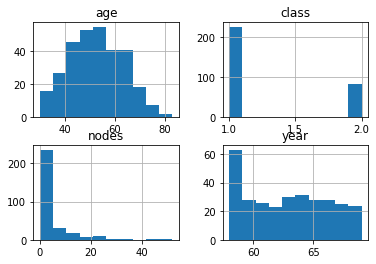

In [2]:
# create histograms of each variable
from pandas import read_csv
from matplotlib import pyplot

# define the dataset location
filename = 'haberman.csv'

# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']

# load the csv file as a data frame
dataframe = read_csv(filename, header=None, names=columns)

# create a histogram plot of each variable
dataframe.hist()
pyplot.show()

In [3]:
# summarize the class ratio
from pandas import read_csv
from collections import Counter

# define the dataset location
filename = 'haberman.csv'

# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']

# load the csv file as a data frame
dataframe = read_csv(filename, header=None, names=columns)

# summarize the class distribution
target = dataframe['class'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [4]:
# baseline model and test harness for the haberman dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define the location of the dataset
full_path = 'haberman.csv'

# load the dataset
X, y = load_dataset(full_path)

# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

# define the reference model
model = DummyClassifier(strategy='prior')

# evaluate the model
scores = evaluate_model(X, y, model)

# summarize performance
print('Mean BSS: %.3f (%.3f)' % (mean(scores), std(scores)))

(306, 3) (306,) Counter({0: 225, 1: 81})
Mean BSS: -0.000 (0.000)


>LR 0.060 (0.143)
>LDA 0.064 (0.154)
>QDA 0.027 (0.221)
>GNB 0.012 (0.212)
>MNB -0.211 (0.369)
>GPC -0.142 (0.041)


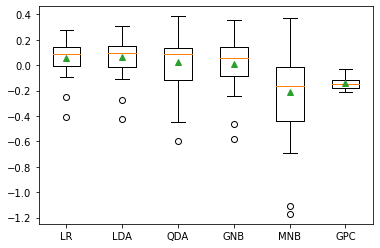

In [5]:
# compare probabilistic model on the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # QDA
    models.append(QuadraticDiscriminantAnalysis())
    names.append('QDA')
    
    # GNB
    models.append(GaussianNB())
    names.append('GNB')
    
    # MNB
    models.append(MultinomialNB())
    names.append('MNB')
    
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    return models, names

# define the location of the dataset
full_path = 'haberman.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):

    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)

    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

    # plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>LR 0.062 (0.140)
>LDA 0.064 (0.154)
>QDA 0.027 (0.221)
>GNB 0.012 (0.212)
>GPC 0.097 (0.133)


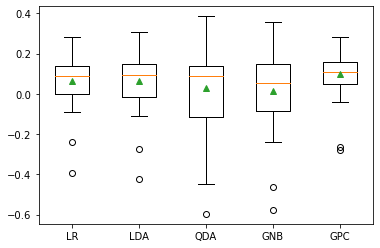

In [6]:
# compare probabilistic models with standardized input on the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# load the dataset
def load_dataset(full_path):

    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)

    # retrieve numpy array
    data = data.values

    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]

    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # QDA
    models.append(QuadraticDiscriminantAnalysis())
    names.append('QDA')
    
    # GNB
    models.append(GaussianNB())
    names.append('GNB')
    
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    return models, names

# define the location of the dataset
full_path = 'haberman.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):

    # create a pipeline
    pipeline = Pipeline(steps=[('t', StandardScaler()),('m',models[i])])

    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)

    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

    # plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>LR 0.110 (0.142)
>LDA 0.107 (0.164)
>GPC 0.100 (0.130)


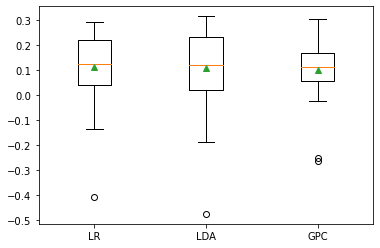

In [7]:
# compare probabilistic models with power transforms on the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
    
    # calculate reference brier score
    ref_probs = [0.26471 for _ in range(len(y_true))]
    bs_ref = brier_score_loss(y_true, ref_probs)
    
    # calculate model brier score
    bs_model = brier_score_loss(y_true, y_prob)
    
    # calculate skill score
    return 1.0 - (bs_model / bs_ref)

# evaluate a model
def evaluate_model(X, y, model):
    
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # define the model evaluation metric
    metric = make_scorer(brier_skill_score, needs_proba=True)
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    
    # LR
    models.append(LogisticRegression(solver='lbfgs'))
    names.append('LR')
    
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    return models, names

# define the location of the dataset
full_path = 'haberman.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    
    # create a pipeline
    steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()),('m',models[i])]
    pipeline = Pipeline(steps=steps)
    
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [8]:
# fit a model and make predictions for the haberman dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# load the dataset
def load_dataset(full_path):
    
    # load the dataset as a numpy array
    data = read_csv(full_path, header=None)
    
    # retrieve numpy array
    data = data.values
    
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

# define the location of the dataset
full_path = 'haberman.csv'

# load the dataset
X, y = load_dataset(full_path)

# fit the model
steps = [('t1', MinMaxScaler()),('t2', PowerTransformer()),('m',LogisticRegression(solver='lbfgs'))]
model = Pipeline(steps=steps)
model.fit(X, y)

# some survival cases
print('Survival Cases:')
data = [[31,59,2], [31,65,4], [34,60,1]]
for row in data:

    # make prediction
    yhat = model.predict_proba([row])

    # get percentage of survival
    p_survive = yhat[0, 0] * 100

    # summarize
    print('>data=%s, Survival=%.3f%%' % (row, p_survive))

# some non-survival cases
print('Non-Survival Cases:')
data = [[44,64,6], [34,66,9], [38,69,21]]
for row in data:
    # make prediction
    yhat = model.predict_proba([row])
    # get percentage of survival
    p_survive = yhat[0, 0] * 100
    # summarize
    print('>data=%s, Survival=%.3f%%' % (row, p_survive))

Survival Cases:
>data=[31, 59, 2], Survival=83.597%
>data=[31, 65, 4], Survival=77.264%
>data=[34, 60, 1], Survival=86.776%
Non-Survival Cases:
>data=[44, 64, 6], Survival=63.092%
>data=[34, 66, 9], Survival=63.452%
>data=[38, 69, 21], Survival=53.389%
